In [2]:
import pandas as pd
import numpy as np

articles = pd.read_csv("../process_articles/minimally_processed_articles.csv")

In [3]:
print(len(articles))
articles.head(1)

2179


,Unnamed: 0,authors,title,date,year,edition,url,text,quarter,year_quarter
0,0,NaN,本期导读,2024-01-01,2024,1.0,http://www.qstheory.cn/dukan/qs/2024-01/01/c_1...,本期发表了习近平总书记的重要文章《以美丽中国建设全面推进人与自然和谐共生的现代化》。文章强调...,1,2024 Q1


In [12]:
# set up matplotlib to use Chinese text
from pathlib import Path
import matplotlib as mpl
import matplotlib.pyplot as plt

fpath = Path(mpl.get_data_path(), "fonts/ttf/NotoSansSC-Regular.ttf")
    
def get_empty_results_dict(df):
    sentiment_by_quarter = {}

    for quarter in df["year_quarter"].unique():
        sentiment_by_quarter[quarter] = 0
        
    return sentiment_by_quarter

def quarter_count(articles_df, search_term):
    term_quarter_count = get_empty_results_dict(articles_df)

    for index, row in articles_df.iterrows():
        year_quarter = row["year_quarter"]
        try: 
            quarter_count = term_quarter_count[year_quarter]
            count = row['text'].count(search_term)
            quarter_count += count
            term_quarter_count[year_quarter] = quarter_count
        except:
            pass

    # sort the years
    term_quarter_count = {k: v for k, v in sorted(term_quarter_count.items(), key=lambda item: item[0])}

    return term_quarter_count

def plot_quarter_counts(df, term, translation):
    # get the data
    term_quarter_count = quarter_count(df, term)
    xvalues = list(term_quarter_count.keys())[:-1]
    yvalues = list(term_quarter_count.values())[:-1]

    # plot
    fig, ax = plt.subplots()

    ax.plot(xvalues, yvalues)
    ax.set_title(f'Qiushi Use of \"{term}\" ({translation})', font=fpath)
    ax.set_xlabel('Quarter')
    ax.set_ylabel(f"\"{term}\" Instance Count", font=fpath)

    ax.tick_params(axis='x', rotation=50)
    ax.grid()

    plt.savefig(f"../visuals/{term}_frequency.png", bbox_inches="tight")

    plt.show()

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

path = '/Users/calebharding/Documents/BYU/2023-2024/China_Project/qiushi_venv/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/NotoSansSC-Regular.ttf'
font = font_manager.FontProperties(fname=path)

def plot_multiple_quarter_counts(articles_df, nested_terms, y_lim=None):
    """Input should be a df of the articles, and a nested list of the form [[term1, translation1], [term2, translation2]]"""

    fig, ax = plt.subplots()

    save_string = ""

    for term_pair in nested_terms:
        term = term_pair[0]
        save_string += term + "_"
        term_quarter_count = quarter_count(articles_df, term)
        xvals = list(term_quarter_count.keys())[:-1]
        yvals = list(term_quarter_count.values())[:-1]

        label = " ".join(term_pair)

        ax.plot(xvals, yvals, label=label)

    ax.set_xlabel("Quarter")
    ax.set_ylabel("Instance Counts")
    if y_lim:
        ax.set_ylim(y_lim)
    ax.set_title("Use of Select Terms in Qiushi")
    ax.legend(prop=font)
    ax.tick_params(axis='x', rotation=50)
    ax.grid()

    plt.savefig(f"../visuals/{save_string}frequency.png", bbox_inches='tight')
    plt.show()

def store_count_results(term, term_quarter_count):
    df = pd.DataFrame(columns=["year_quarter", "count"])
    for quarter in term_quarter_count.keys():
        df.loc[len(df)] = [quarter, term_quarter_count[quarter]]

    filename = term + "_quarter_counts.csv"

    df.to_csv(f"./frequency_counts/{filename}", index=False)
        

In [5]:
store_count_results("经济", quarter_count(articles, "经济"))

In [95]:
econ_counts = quarter_count(articles, "经济")

sum(econ_counts.values()) / len(econ_counts)

752.4285714285714

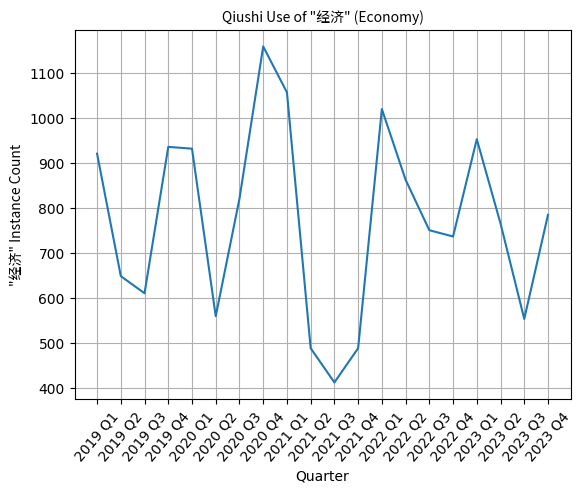

In [91]:
plot_quarter_counts(articles, "经济", "Economy")

In [75]:
store_count_results("美国", quarter_count(articles, "美国"))

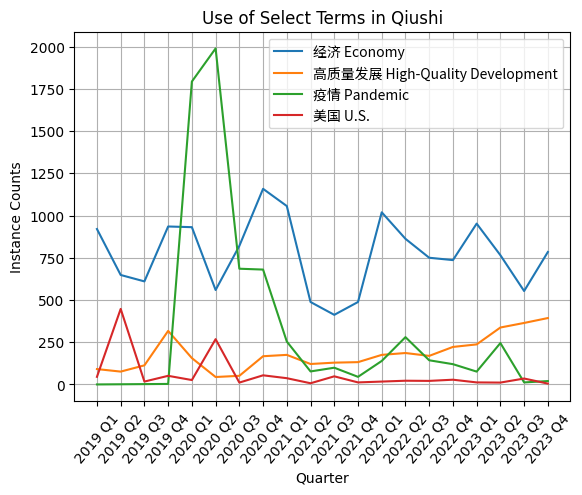

In [92]:
plot_multiple_quarter_counts(articles, [["经济", "Economy"],["高质量发展", "High-Quality Development"],["疫情", "Pandemic"], ["美国", "U.S."]])

Full Term_quarter_count dict: {'2024 Q1': 355, '2023 Q1': 952, '2023 Q2': 765, '2023 Q3': 553, '2023 Q4': 784, '2022 Q1': 1019, '2022 Q2': 862, '2022 Q3': 750, '2022 Q4': 736, '2021 Q1': 1056, '2021 Q2': 488, '2021 Q3': 412, '2021 Q4': 488, '2020 Q1': 931, '2020 Q2': 559, '2020 Q3': 820, '2020 Q4': 1158, '2019 Q1': 920, '2019 Q2': 648, '2019 Q3': 610, '2019 Q4': 935}


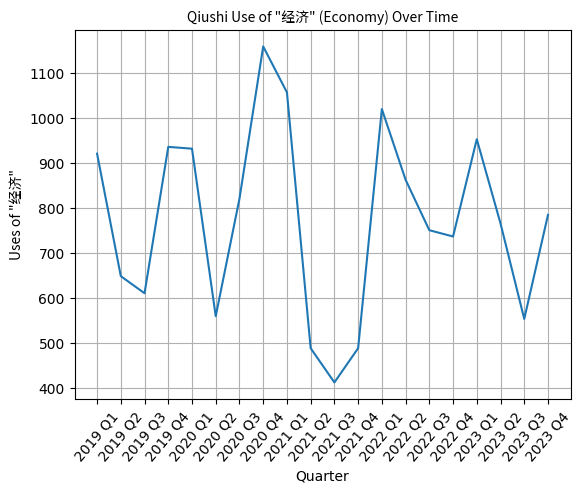

In [52]:
plot_quarter_counts(articles, "经济", "Economy")

Full Term_quarter_count dict: {'2024 Q1': 3, '2023 Q1': 12, '2023 Q2': 11, '2023 Q3': 35, '2023 Q4': 5, '2022 Q1': 17, '2022 Q2': 22, '2022 Q3': 21, '2022 Q4': 28, '2021 Q1': 37, '2021 Q2': 7, '2021 Q3': 48, '2021 Q4': 12, '2020 Q1': 26, '2020 Q2': 268, '2020 Q3': 11, '2020 Q4': 54, '2019 Q1': 45, '2019 Q2': 447, '2019 Q3': 17, '2019 Q4': 51}


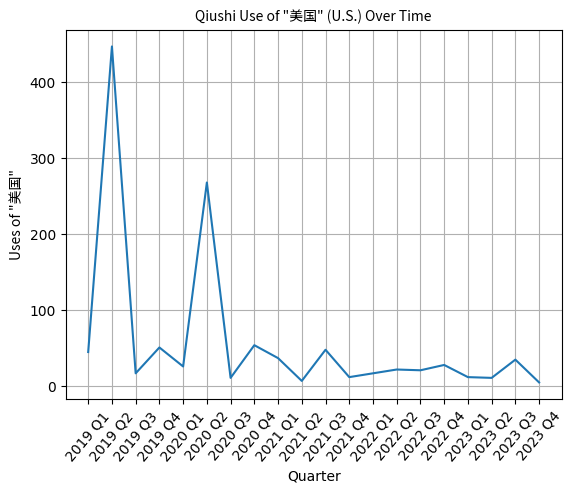

In [53]:
plot_quarter_counts(articles, "美国", "U.S.")

Full Term_quarter_count dict: {'2024 Q1': 725, '2023 Q1': 2200, '2023 Q2': 2416, '2023 Q3': 2306, '2023 Q4': 2025, '2022 Q1': 1993, '2022 Q2': 1376, '2022 Q3': 2330, '2022 Q4': 3380, '2021 Q1': 1722, '2021 Q2': 2721, '2021 Q3': 3060, '2021 Q4': 2697, '2020 Q1': 1373, '2020 Q2': 1641, '2020 Q3': 1904, '2020 Q4': 1850, '2019 Q1': 1738, '2019 Q2': 2072, '2019 Q3': 1714, '2019 Q4': 2231}


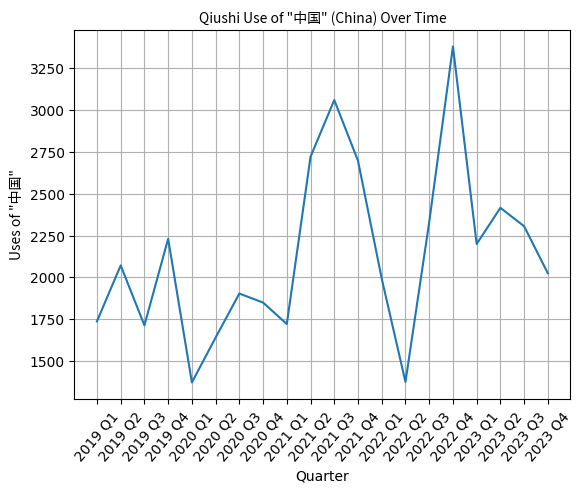

In [54]:
plot_quarter_counts(articles, "中国", "China")

Full Term_quarter_count dict: {'2024 Q1': 725, '2023 Q1': 2200, '2023 Q2': 2416, '2023 Q3': 2306, '2023 Q4': 2025, '2022 Q1': 1993, '2022 Q2': 1376, '2022 Q3': 2330, '2022 Q4': 3380, '2021 Q1': 1722, '2021 Q2': 2721, '2021 Q3': 3060, '2021 Q4': 2697, '2020 Q1': 1373, '2020 Q2': 1641, '2020 Q3': 1904, '2020 Q4': 1850, '2019 Q1': 1738, '2019 Q2': 2072, '2019 Q3': 1714, '2019 Q4': 2231}
Full Term_quarter_count dict: {'2024 Q1': 3, '2023 Q1': 12, '2023 Q2': 11, '2023 Q3': 35, '2023 Q4': 5, '2022 Q1': 17, '2022 Q2': 22, '2022 Q3': 21, '2022 Q4': 28, '2021 Q1': 37, '2021 Q2': 7, '2021 Q3': 48, '2021 Q4': 12, '2020 Q1': 26, '2020 Q2': 268, '2020 Q3': 11, '2020 Q4': 54, '2019 Q1': 45, '2019 Q2': 447, '2019 Q3': 17, '2019 Q4': 51}


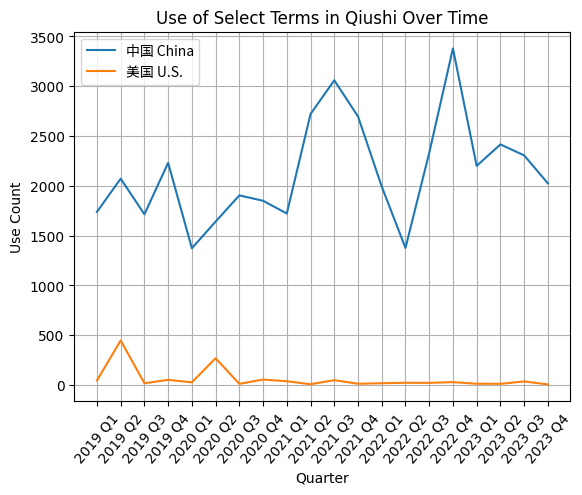

In [55]:
plot_multiple_quarter_counts(articles, [["中国", "China"], ["美国", "U.S."]])

Full Term_quarter_count dict: {'2024 Q1': 115, '2023 Q1': 237, '2023 Q2': 337, '2023 Q3': 364, '2023 Q4': 393, '2022 Q1': 175, '2022 Q2': 186, '2022 Q3': 169, '2022 Q4': 222, '2021 Q1': 175, '2021 Q2': 121, '2021 Q3': 129, '2021 Q4': 132, '2020 Q1': 156, '2020 Q2': 44, '2020 Q3': 51, '2020 Q4': 167, '2019 Q1': 91, '2019 Q2': 76, '2019 Q3': 113, '2019 Q4': 317}


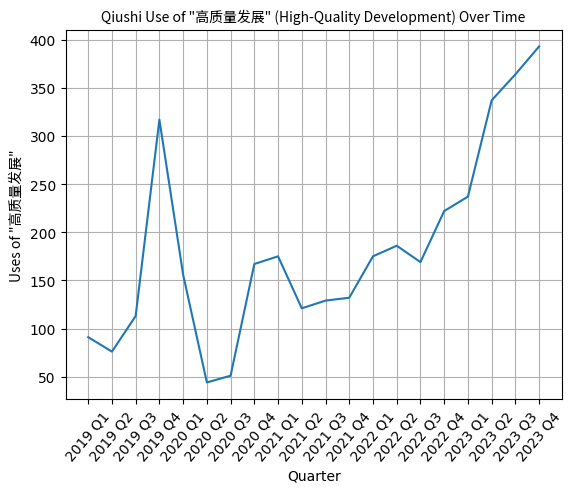

In [56]:
plot_quarter_counts(articles, "高质量发展", "High-Quality Development")

Full Term_quarter_count dict: {'2024 Q1': 355, '2023 Q1': 952, '2023 Q2': 765, '2023 Q3': 553, '2023 Q4': 784, '2022 Q1': 1019, '2022 Q2': 862, '2022 Q3': 750, '2022 Q4': 736, '2021 Q1': 1056, '2021 Q2': 488, '2021 Q3': 412, '2021 Q4': 488, '2020 Q1': 931, '2020 Q2': 559, '2020 Q3': 820, '2020 Q4': 1158, '2019 Q1': 920, '2019 Q2': 648, '2019 Q3': 610, '2019 Q4': 935}
Full Term_quarter_count dict: {'2024 Q1': 115, '2023 Q1': 237, '2023 Q2': 337, '2023 Q3': 364, '2023 Q4': 393, '2022 Q1': 175, '2022 Q2': 186, '2022 Q3': 169, '2022 Q4': 222, '2021 Q1': 175, '2021 Q2': 121, '2021 Q3': 129, '2021 Q4': 132, '2020 Q1': 156, '2020 Q2': 44, '2020 Q3': 51, '2020 Q4': 167, '2019 Q1': 91, '2019 Q2': 76, '2019 Q3': 113, '2019 Q4': 317}
Full Term_quarter_count dict: {'2024 Q1': 9, '2023 Q1': 76, '2023 Q2': 245, '2023 Q3': 12, '2023 Q4': 20, '2022 Q1': 139, '2022 Q2': 280, '2022 Q3': 143, '2022 Q4': 120, '2021 Q1': 254, '2021 Q2': 77, '2021 Q3': 99, '2021 Q4': 45, '2020 Q1': 1793, '2020 Q2': 1989, '2

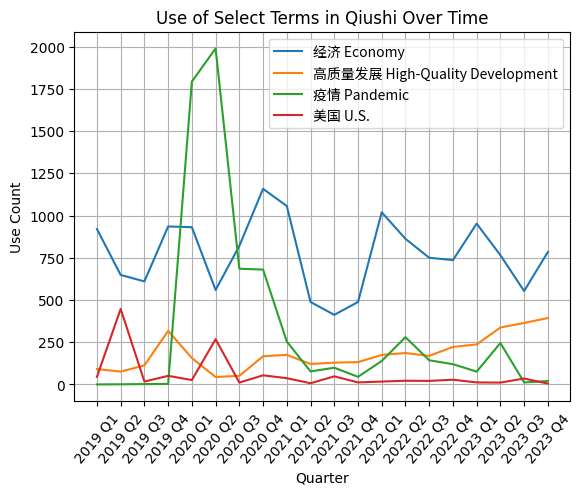

In [57]:
plot_multiple_quarter_counts(articles, [["经济", "Economy"],["高质量发展", "High-Quality Development"],["疫情", "Pandemic"], ["美国", "U.S."]])

Full Term_quarter_count dict: {'2024 Q1': 4, '2023 Q1': 6, '2023 Q2': 10, '2023 Q3': 5, '2023 Q4': 11, '2022 Q1': 0, '2022 Q2': 0, '2022 Q3': 5, '2022 Q4': 7, '2021 Q1': 0, '2021 Q2': 0, '2021 Q3': 0, '2021 Q4': 0, '2020 Q1': 0, '2020 Q2': 0, '2020 Q3': 0, '2020 Q4': 0, '2019 Q1': 0, '2019 Q2': 0, '2019 Q3': 0, '2019 Q4': 0}


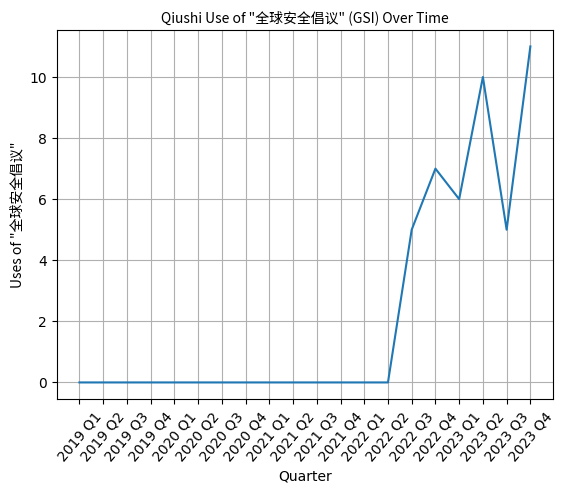

In [58]:
plot_quarter_counts(articles, "全球安全倡议", "GSI")

Full Term_quarter_count dict: {'2024 Q1': 4, '2023 Q1': 6, '2023 Q2': 12, '2023 Q3': 5, '2023 Q4': 12, '2022 Q1': 3, '2022 Q2': 0, '2022 Q3': 4, '2022 Q4': 11, '2021 Q1': 0, '2021 Q2': 0, '2021 Q3': 0, '2021 Q4': 4, '2020 Q1': 0, '2020 Q2': 0, '2020 Q3': 0, '2020 Q4': 0, '2019 Q1': 0, '2019 Q2': 0, '2019 Q3': 0, '2019 Q4': 0}


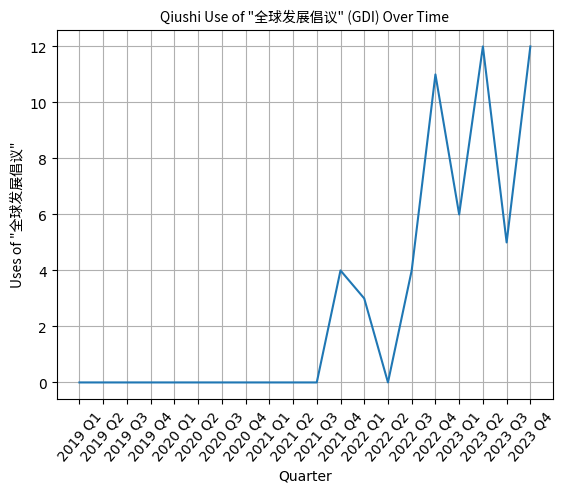

In [59]:
plot_quarter_counts(articles, "全球发展倡议", "GDI")

Full Term_quarter_count dict: {'2024 Q1': 4, '2023 Q1': 6, '2023 Q2': 10, '2023 Q3': 5, '2023 Q4': 11, '2022 Q1': 0, '2022 Q2': 0, '2022 Q3': 5, '2022 Q4': 7, '2021 Q1': 0, '2021 Q2': 0, '2021 Q3': 0, '2021 Q4': 0, '2020 Q1': 0, '2020 Q2': 0, '2020 Q3': 0, '2020 Q4': 0, '2019 Q1': 0, '2019 Q2': 0, '2019 Q3': 0, '2019 Q4': 0}
Full Term_quarter_count dict: {'2024 Q1': 4, '2023 Q1': 6, '2023 Q2': 12, '2023 Q3': 5, '2023 Q4': 12, '2022 Q1': 3, '2022 Q2': 0, '2022 Q3': 4, '2022 Q4': 11, '2021 Q1': 0, '2021 Q2': 0, '2021 Q3': 0, '2021 Q4': 4, '2020 Q1': 0, '2020 Q2': 0, '2020 Q3': 0, '2020 Q4': 0, '2019 Q1': 0, '2019 Q2': 0, '2019 Q3': 0, '2019 Q4': 0}
Full Term_quarter_count dict: {'2024 Q1': 5, '2023 Q1': 0, '2023 Q2': 28, '2023 Q3': 5, '2023 Q4': 17, '2022 Q1': 0, '2022 Q2': 0, '2022 Q3': 0, '2022 Q4': 0, '2021 Q1': 0, '2021 Q2': 0, '2021 Q3': 0, '2021 Q4': 0, '2020 Q1': 0, '2020 Q2': 0, '2020 Q3': 0, '2020 Q4': 0, '2019 Q1': 0, '2019 Q2': 0, '2019 Q3': 0, '2019 Q4': 0}


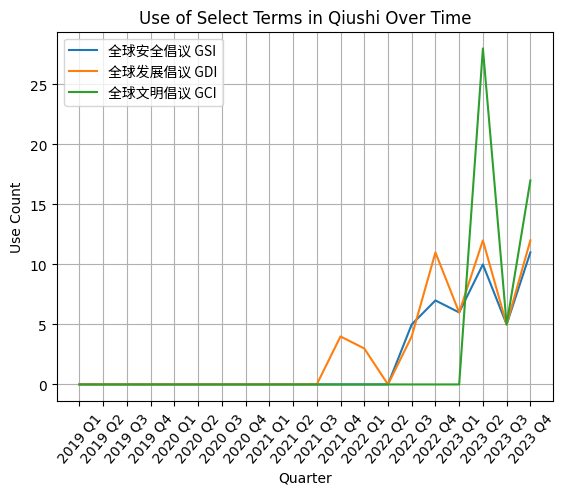

In [60]:
plot_multiple_quarter_counts(articles, [["全球安全倡议", "GSI"],["全球发展倡议", "GDI"],["全球文明倡议", "GCI"]])

Full Term_quarter_count dict: {'2024 Q1': 4, '2023 Q1': 6, '2023 Q2': 10, '2023 Q3': 5, '2023 Q4': 11, '2022 Q1': 0, '2022 Q2': 0, '2022 Q3': 5, '2022 Q4': 7, '2021 Q1': 0, '2021 Q2': 0, '2021 Q3': 0, '2021 Q4': 0, '2020 Q1': 0, '2020 Q2': 0, '2020 Q3': 0, '2020 Q4': 0, '2019 Q1': 0, '2019 Q2': 0, '2019 Q3': 0, '2019 Q4': 0}
Full Term_quarter_count dict: {'2024 Q1': 4, '2023 Q1': 6, '2023 Q2': 12, '2023 Q3': 5, '2023 Q4': 12, '2022 Q1': 3, '2022 Q2': 0, '2022 Q3': 4, '2022 Q4': 11, '2021 Q1': 0, '2021 Q2': 0, '2021 Q3': 0, '2021 Q4': 4, '2020 Q1': 0, '2020 Q2': 0, '2020 Q3': 0, '2020 Q4': 0, '2019 Q1': 0, '2019 Q2': 0, '2019 Q3': 0, '2019 Q4': 0}
Full Term_quarter_count dict: {'2024 Q1': 5, '2023 Q1': 0, '2023 Q2': 28, '2023 Q3': 5, '2023 Q4': 17, '2022 Q1': 0, '2022 Q2': 0, '2022 Q3': 0, '2022 Q4': 0, '2021 Q1': 0, '2021 Q2': 0, '2021 Q3': 0, '2021 Q4': 0, '2020 Q1': 0, '2020 Q2': 0, '2020 Q3': 0, '2020 Q4': 0, '2019 Q1': 0, '2019 Q2': 0, '2019 Q3': 0, '2019 Q4': 0}
Full Term_quarter_

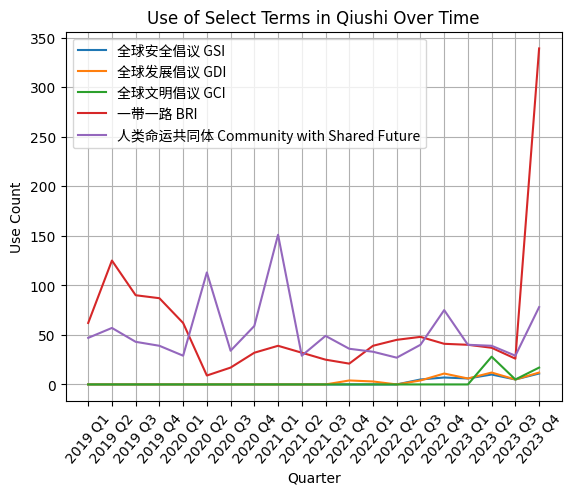

In [61]:
plot_multiple_quarter_counts(articles, [["全球安全倡议", "GSI"],["全球发展倡议", "GDI"],["全球文明倡议", "GCI"],["一带一路", "BRI"], ["人类命运共同体", "Community with Shared Future"]])

Full Term_quarter_count dict: {'2024 Q1': 5, '2023 Q1': 0, '2023 Q2': 28, '2023 Q3': 5, '2023 Q4': 17, '2022 Q1': 0, '2022 Q2': 0, '2022 Q3': 0, '2022 Q4': 0, '2021 Q1': 0, '2021 Q2': 0, '2021 Q3': 0, '2021 Q4': 0, '2020 Q1': 0, '2020 Q2': 0, '2020 Q3': 0, '2020 Q4': 0, '2019 Q1': 0, '2019 Q2': 0, '2019 Q3': 0, '2019 Q4': 0}


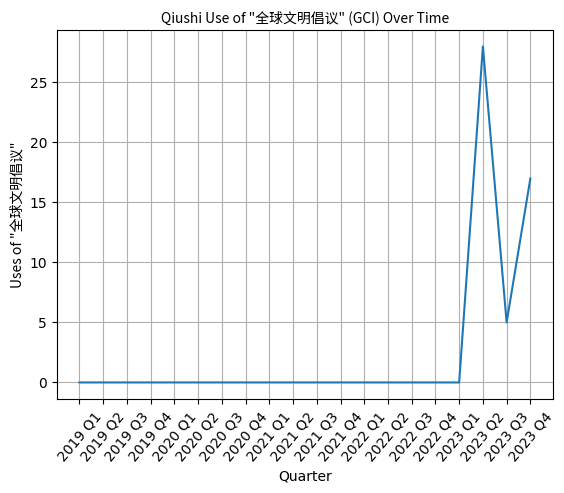

In [62]:
plot_quarter_counts(articles, "全球文明倡议", "GCI")

Full Term_quarter_count dict: {'2024 Q1': 20, '2023 Q1': 40, '2023 Q2': 37, '2023 Q3': 26, '2023 Q4': 339, '2022 Q1': 39, '2022 Q2': 45, '2022 Q3': 48, '2022 Q4': 41, '2021 Q1': 39, '2021 Q2': 32, '2021 Q3': 25, '2021 Q4': 21, '2020 Q1': 62, '2020 Q2': 9, '2020 Q3': 17, '2020 Q4': 32, '2019 Q1': 62, '2019 Q2': 125, '2019 Q3': 90, '2019 Q4': 87}


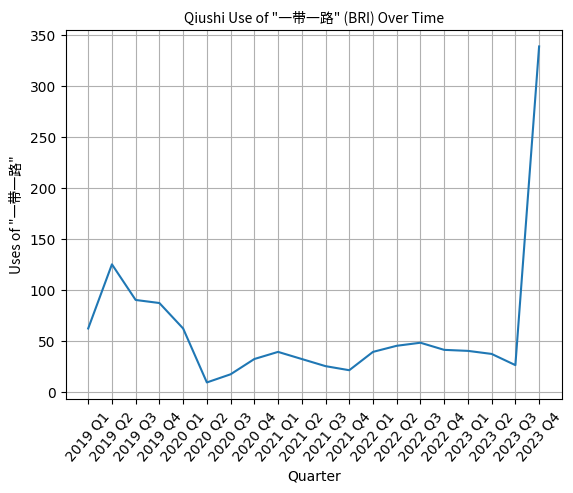

In [63]:
plot_quarter_counts(articles, "一带一路", "BRI")

Full Term_quarter_count dict: {'2024 Q1': 32, '2023 Q1': 40, '2023 Q2': 39, '2023 Q3': 29, '2023 Q4': 78, '2022 Q1': 33, '2022 Q2': 27, '2022 Q3': 40, '2022 Q4': 75, '2021 Q1': 151, '2021 Q2': 29, '2021 Q3': 49, '2021 Q4': 36, '2020 Q1': 29, '2020 Q2': 113, '2020 Q3': 34, '2020 Q4': 59, '2019 Q1': 47, '2019 Q2': 57, '2019 Q3': 43, '2019 Q4': 39}


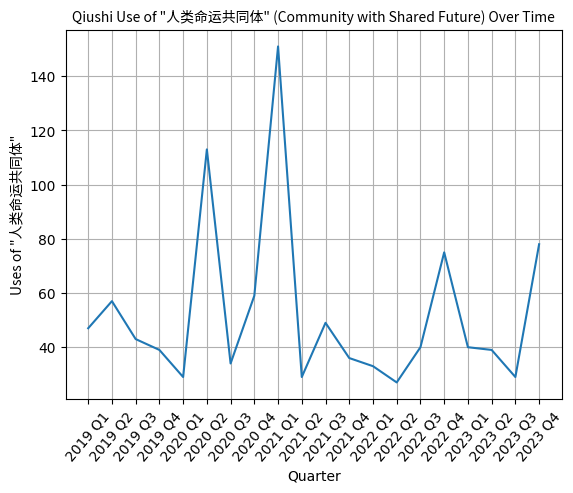

In [64]:
plot_quarter_counts(articles, "人类命运共同体", "Community with Shared Future")

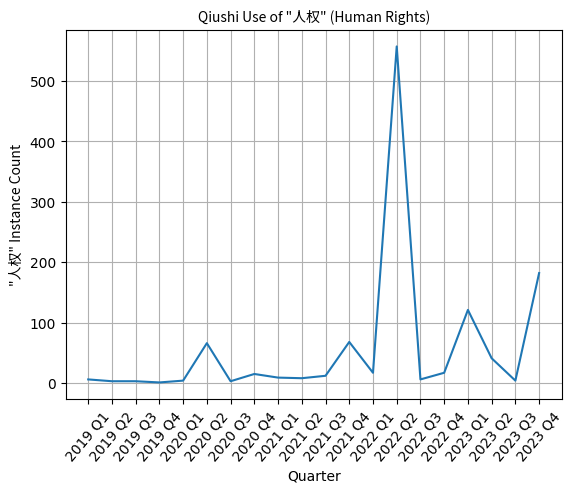

In [93]:
plot_quarter_counts(articles, "人权", "Human Rights")

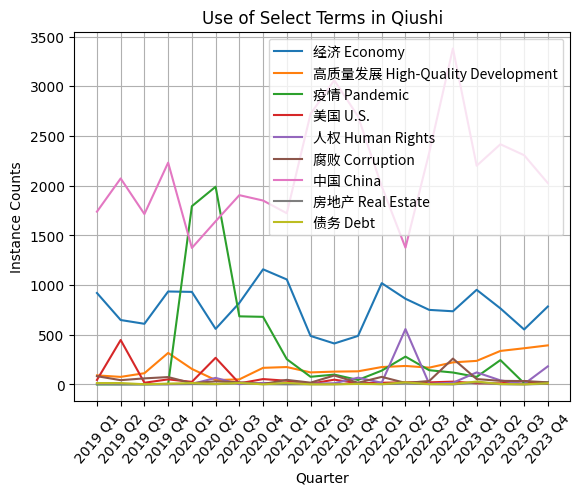

In [99]:
plot_multiple_quarter_counts(articles, [["经济", "Economy"],["高质量发展", "High-Quality Development"],["疫情", "Pandemic"], ["美国", "U.S."], ["人权", "Human Rights"], ["腐败", "Corruption"], ["中国", "China"], ["房地产", "Real Estate"], ["债务", "Debt"]])

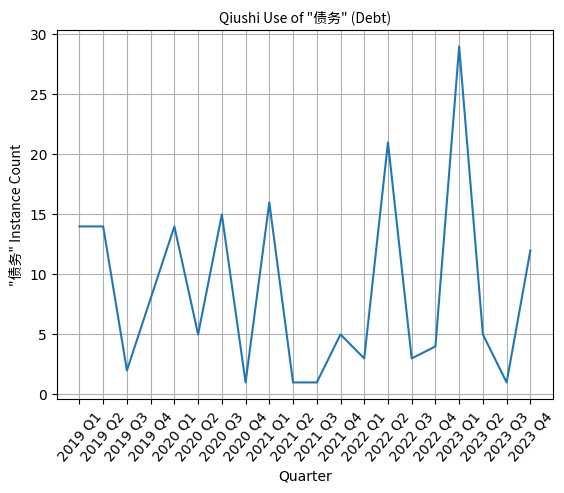

In [100]:
plot_quarter_counts(articles, "债务", "Debt")

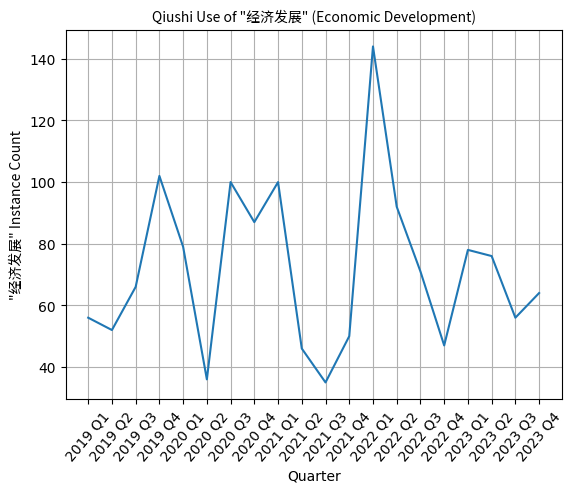

In [6]:
plot_quarter_counts(articles, "经济发展", "Economic Development")

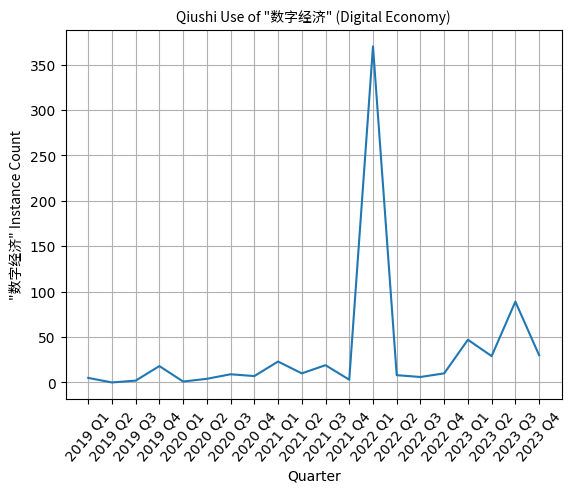

In [8]:
plot_quarter_counts(articles, "数字经济", "Digital Economy")

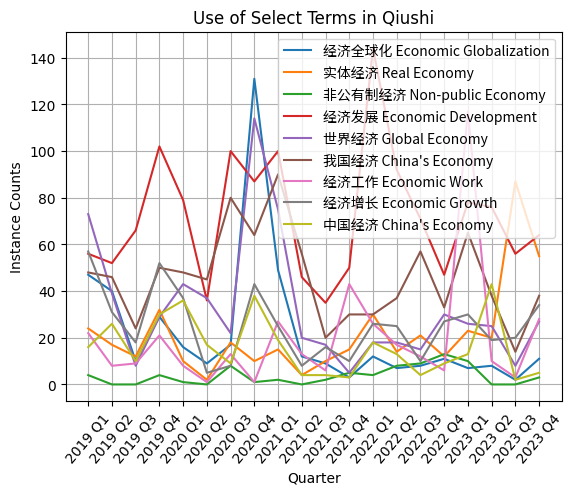

In [10]:
# pairs that were in the top two pairs for at least one quarter

plot_multiple_quarter_counts(articles, [['经济全球化','Economic Globalization'], ['实体经济','Real Economy'], ['非公有制经济','Non-public Economy'], ['经济发展','Economic Development'], ['世界经济','Global Economy'], ['我国经济','China\'s Economy'], ['经济工作', "Economic Work"], ['经济增长','Economic Growth'],  ['中国经济','China\'s Economy']])

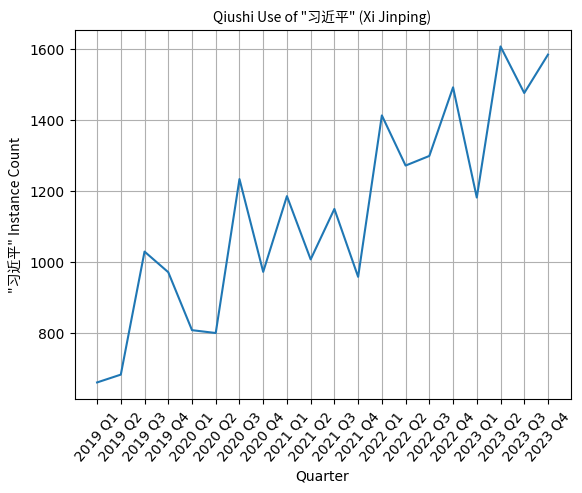

In [14]:
plot_quarter_counts(articles, "习近平", 'Xi Jinping')

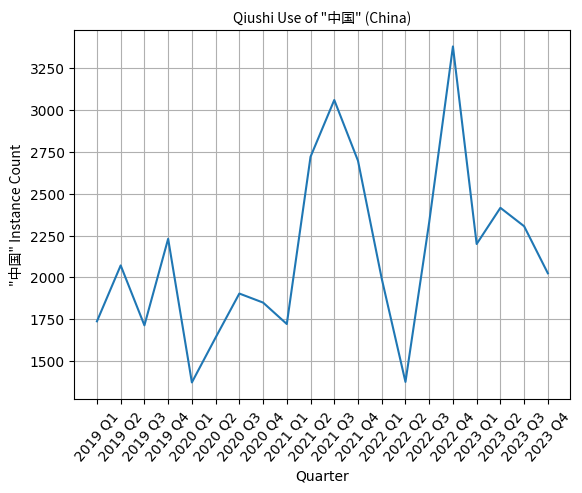

In [15]:
plot_quarter_counts(articles, "中国", 'China')


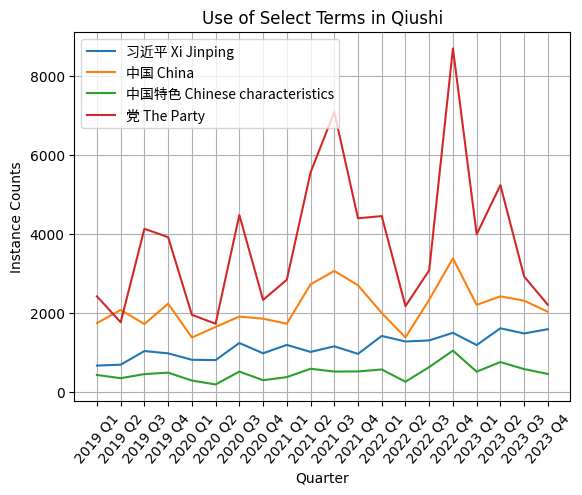

In [18]:
plot_multiple_quarter_counts(articles, [["习近平", 'Xi Jinping'],["中国", 'China'],["中国特色", 'Chinese characteristics'],["党", 'The Party']])